In [1]:
import numpy as np
import torchvision
from train import train
import matplotlib.pyplot as plt
from vanilla_rnn import VanillaRNN
from lstm import LSTM

# Most of constants defined in train.py

In [2]:
# Training process demo with T=10.
print('Train on T = 10:')
epochs, accs, losses, acc_10 = train(LSTM, 10, print_log=True)

Train on T = 10:
step: 0, loss: 2.303664, test acc: 0.103
step: 10, loss: 2.302703, test acc: 0.1039
step: 20, loss: 2.307053, test acc: 0.1029
step: 30, loss: 2.311343, test acc: 0.1115
step: 40, loss: 2.265141, test acc: 0.108
step: 50, loss: 2.105149, test acc: 0.2789
step: 60, loss: 2.15807, test acc: 0.3091
step: 70, loss: 2.097808, test acc: 0.3978
step: 80, loss: 2.084364, test acc: 0.337
step: 90, loss: 2.037084, test acc: 0.4984
step: 100, loss: 2.003257, test acc: 0.5028
step: 110, loss: 1.945967, test acc: 0.5202
step: 120, loss: 1.968904, test acc: 0.6239
step: 130, loss: 1.900899, test acc: 0.6141
step: 140, loss: 1.928441, test acc: 0.6913
step: 150, loss: 1.925799, test acc: 0.6852
step: 160, loss: 1.898167, test acc: 0.7516
step: 170, loss: 1.809468, test acc: 0.6682
step: 180, loss: 1.827011, test acc: 0.7155
step: 190, loss: 1.805002, test acc: 0.7047
step: 200, loss: 1.775908, test acc: 0.8034
step: 210, loss: 1.753147, test acc: 0.8009
step: 220, loss: 1.907086, tes

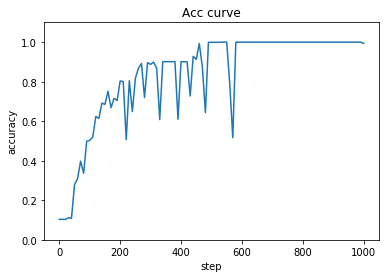

In [3]:
# accuracy curve of test data
acc_plot = plt.plot(epochs, accs)
plt.ylim([0, 1.1])
plt.title("Acc curve")
plt.xlabel('step')
plt.ylabel('accuracy')
plt.show()
plt.close()

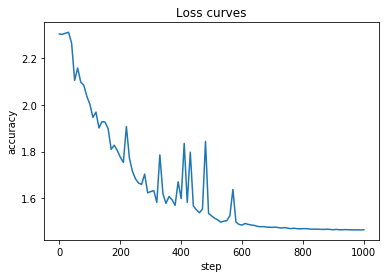

In [4]:
# loss curve of training data
losses_plot = plt.plot(epochs, losses)
plt.title("Loss curves")
plt.xlabel('step')
plt.ylabel('accuracy')
plt.show()
plt.close()

In [5]:
# Compare with RNN
seq_vrnn_val_losses = []
seq_vrnn_val_accs = []
seq_lstm_val_losses = []
seq_lstm_val_accs = []

vrnn_test_accs = []
lstm_test_accs = []


seq_lengths = [3, 5, 10, 20, 30]
for seq_length in seq_lengths:
    print('Training with seqence length: {}'.format(seq_length))
    epochs, rnn_val_accs, rnn_val_losses, rnn_test_acc = train(VanillaRNN, seq_length, print_log=False)
    epochs, lstm_val_accs, lstm_val_losses, lstm_test_acc = train(LSTM, seq_length, print_log=False)
    print('VanillaRNN: T=3, test acc={}'.format(rnn_test_acc))
    print('LSTM: T=3, test acc={}'.format(lstm_test_acc))
    print()
    seq_vrnn_val_losses.append(rnn_val_losses)
    seq_lstm_val_losses.append(lstm_val_losses)
    seq_vrnn_val_accs.append(rnn_val_accs)
    seq_lstm_val_accs.append(lstm_val_accs)
    vrnn_test_accs.append(rnn_test_acc)
    lstm_test_accs.append(lstm_test_acc)

Training with seqence length: 3
VanillaRNN: T=3, test acc=1.0
LSTM: T=3, test acc=1.0

Training with seqence length: 5
VanillaRNN: T=3, test acc=0.899
LSTM: T=3, test acc=1.0

Training with seqence length: 10
VanillaRNN: T=3, test acc=0.1032
LSTM: T=3, test acc=1.0

Training with seqence length: 20
VanillaRNN: T=3, test acc=0.0974
LSTM: T=3, test acc=0.8777

Training with seqence length: 30
VanillaRNN: T=3, test acc=0.0973
LSTM: T=3, test acc=0.8832



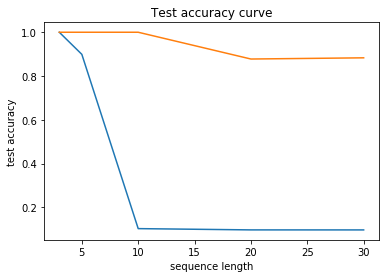

In [6]:
# Compare of accuracy trend.
plt.plot(
    seq_lengths,
    [vrnn_test_accs[i] for i in range(len(seq_lengths))],
    label='VanillaRNN Test Accuracy'
)
plt.plot(
    seq_lengths,
    [lstm_test_accs[i] for i in range(len(seq_lengths))],
    label='LSTM Test Accuracy'
)

plt.title("Test accuracy curve")
plt.xlabel('sequence length')
plt.ylabel('test accuracy')
plt.show()
plt.close()

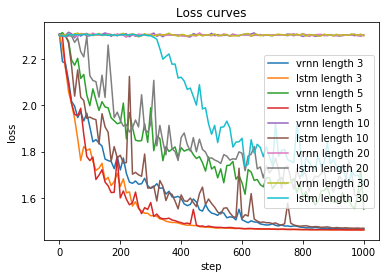

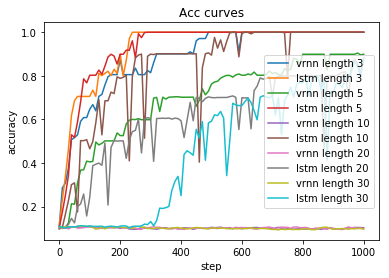

In [7]:
# Compare of accurac and loss curve.

# Loss curves
for idx in range(len(seq_lengths)):
    plt.plot(epochs, seq_vrnn_val_losses[idx], label='vrnn length {}'.format(seq_lengths[idx]))
    plt.plot(epochs, seq_lstm_val_losses[idx], label='lstm length {}'.format(seq_lengths[idx]))

plt.legend(loc="best")
plt.title("Loss curves")
plt.xlabel('step')
plt.ylabel('loss')
plt.show()
plt.close()

# Accuracy curves
for idx in range(len(seq_lengths)):
    plt.plot(epochs, seq_vrnn_val_accs[idx], label='vrnn length {}'.format(seq_lengths[idx]))
    plt.plot(epochs, seq_lstm_val_accs[idx], label='lstm length {}'.format(seq_lengths[idx]))

plt.legend(loc="best")
plt.title("Acc curves")
plt.xlabel('step')
plt.ylabel('accuracy')
plt.show()
plt.close()

We can see that accuracies of both networks are decrease along with sequence length increasing.
Moreover, normal rnn can not converge if sequence length large than 10 while lstm still have 80% accuracy with 30 sequence length.  This experiment shows that memory gate can keep infomation during recurrence.